In [3]:
# Importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Guardando as tabelas dentro de variáveis:
order_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
orders_review = pd.read_csv('olist_order_reviews_dataset.csv')

- Link do repositório no kaggle - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

### **PERGUNTAS QUE IREMOS DIRECIONAR A ANÁLISE:**

* Qual é a distribuição geográfica dos clientes por estado?</br></br>
* Quais são os principais estados e cidades onde os clientes estão concentrados? </br></br>
* Existe alguma relação entre o comprimento ou descrição do produto e sua popularidade de venda? </br></br>
* Há alguma relação entre o peso dos produtos e seu custo de frete? </br></br>
* O peso dos produtos afeta os custos de envio? </br></br>
* Existe algum padrão sazonal nas datas de compra dos pedidos? </br></br>
* Qual é o tempo médio de entrega dos pedidos em relação à data estimada de entrega? </br></br>
* Qual é a pontuação média de revisão dos pedidos? </br></br>
* Qual é o tempo médio entre a compra e a aprovação do pedido?


#### **ESQUEMA DE COMOS OS DADOS DAS TABELAS SE RELACIONAM:**

<div style="text-align:center">
    <img src="https://i.imgur.com/HRhd2Y0.png" width="900">
</div>

### **Números de Exemplares (linhas) e Dimensões (colunas)**



*  Número de linhas e colunas da tabela Order: Este é o conjunto de dados principal. Em cada pedido você poderá encontrar todas as outras informações.

##### **DESCRIÇÃO DAS COLUNAS:**

- **order_id**: identificador único do pedido </br></br>
- **customer_id**: identificador único do cliente que fez o pedido</br></br>
- **order_status**: status da encomenda (se já foi entregue ou enviada)</br></br>
- **order_purchase_timestamp**: data e hora da compra</br></br>
- **order_approved_at**: data e hora da aprovação do pagamento</br></br>
- **order_delivered_carrier_date**: data e hora da postagem do pedido</br></br>
- **order_delivered_customer_date**: data da entrega do pedido pro cliente</br></br>
- **order_estimated_delivery_date**: data estimada de entrega que foi informada ao cliente na hora da compra</br></br>


In [16]:
# Primeiras 5 linhas da tabela:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
print(f"A tabela Order possui {orders.shape[0]} linhas e {orders.shape[1]} colunas.")

A tabela Order possui 99441 linhas e 8 colunas.


In [7]:
orders.describe()

,order_purchase_timestamp,order_approved_at
count,99441,99281
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128
min,2016-09-04 21:15:19,2016-09-15 12:16:38
25%,2017-09-12 14:46:19,2017-09-12 23:24:16
50%,2018-01-18 23:04:36,2018-01-19 11:36:13
75%,2018-05-04 15:42:16,2018-05-04 20:35:10
max,2018-10-17 17:30:18,2018-09-03 17:40:06


*  Número de linhas e colunas da tabela Order Items: Nessa tabela há dados sobre os itens adiquiridos em cada pedido.

##### **DESCRIÇÃO DAS COLUNAS:**

- **order_id**: identificador único do pedido </br></br>
- **order_item_id**: Número que indica a quantidade de itens incluídos no mesmo pedido</br></br>
- **product_id**: identificador único do produto </br></br>
- **seller_id**: identificador único do vendendor</br></br>
- **shipping_limit_date**: data limite de envio do vendedor para o envio do pedido ao parceiro logístico</br></br>
- **price**: preço do produto</br></br>
- **freight_value**: valor do frete</br></br>

In [17]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
print(f"A tabela Order Items possui {order_items.shape[0]} linhas e {order_items.shape[1]} colunas.")

A tabela Order Items possui 112650 linhas e 7 colunas.


In [8]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


* Número de linhas e colunas da tabela Customers: Este conjunto de dados contém informações sobre o cliente e sua localização.

##### **DESCRIÇÃO DAS COLUNAS:**

- **customer_id**: chave para o conjunto de dados de pedidos, cada pedido possui um customer_id_exclusivo </br><br>
- **custome_unique_id**: identificador único do cliente </br><br>
- **customer_zip_code_prefix**: primeiros cinco dígitos do CEP </br><br>
- **customer_city**: cidade do cliente </br><br>
- **customer_state**: estado do cliente </br><br>

In [19]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
print(f"A tabela Customers Items possui {customers.shape[0]} linhas e {customers.shape[1]} colunas.")

A tabela Customers Items possui 99441 linhas e 5 colunas.


* Número de linhas e colunas da tabela Products: Este conjunto de dados inclui dados sobre os produtos vendidos pela Olist.

##### **DESCRIÇÃO DAS COLUNAS:**

- **product_id**: identificador único do produto </br></br>
- **product_category_name**: categoria do produto</br></br>
- **product_name_lenght**: número de caracteres do nome do produto</br></br>
- **product_description_lenght**: número de caracteres da descrição do produto</br></br>
- **product_photos_qty**: número de fotos publicadas do produto</br></br>
- **products_weight_g**: peso do produto medido em gramas</br></br>
- **product_length_cm**: comprimento do produto medido em centímetros</br></br>
- **product_height_cm**: altura do produto medido em centímetros</br></br>
- **product_widht_cm**: largura do produto medida em centímetros</br></br>

In [21]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [22]:
print(f"A tabela Products Items possui {products.shape[0]} linhas e {products.shape[1]} colunas.")

A tabela Products Items possui 32951 linhas e 9 colunas.


In [10]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


* Número de linhas e colunas da tabela Orders Review: Este conjunto de dados inclui dados sobre as avaliações feitas pelos clientes.

##### **DESCRIÇÃO DAS COLUNAS:**

- **review_id**: identificado únido da avaliação </br></br>
- **order_id**: identificador do pedido que foi avaliado </br></br>
- **review_score**: nota que varia de 1 a 5 dada pelo cliente </br></br>
- **review_comment_title**: titulo do comentário da avaliação </br></br>
- **review_comment_message**: comentário de avaliação deixada pelo cliente </br></br>
- **review_creation_date**: data que a pesquisa de satisfação foi enviada ao cliente </br></br>
- **review_answer_timestamp**: data que o cliente respondeu a pesquisa </br></br>

In [143]:
orders_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [144]:
print(f"A tabela Orders Review possui {orders_review.shape[0]} linhas e {orders_review.shape[1]} colunas.")

A tabela Orders Review possui 99224 linhas e 7 colunas.


In [11]:
orders_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### **TIPOS DE DADOS**

Aqui iremos utilizar a função **info** para que possamos ver os tipos de dados que cada coluna das tabelas armazena:

> </br> Podemos observar que as colunas que armazenam dados do typo objeto são o que chamam de variáveis qualitativas. </br></br>

In [24]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### **Linha do tempo da Empresa (2016 até 2018)**

In [38]:
# Formatar a coluna onde é armazenada a data dos pedidos
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [39]:
# Extrair o ano e o mês da coluna de data
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month

In [40]:
# Agrupar os pedidos por ano e mês e contar a quantidade de pedidos para cada grupo
orders_por_mes = orders.groupby(['year', 'month']).size().reset_index(name='quantidade_pedidos')

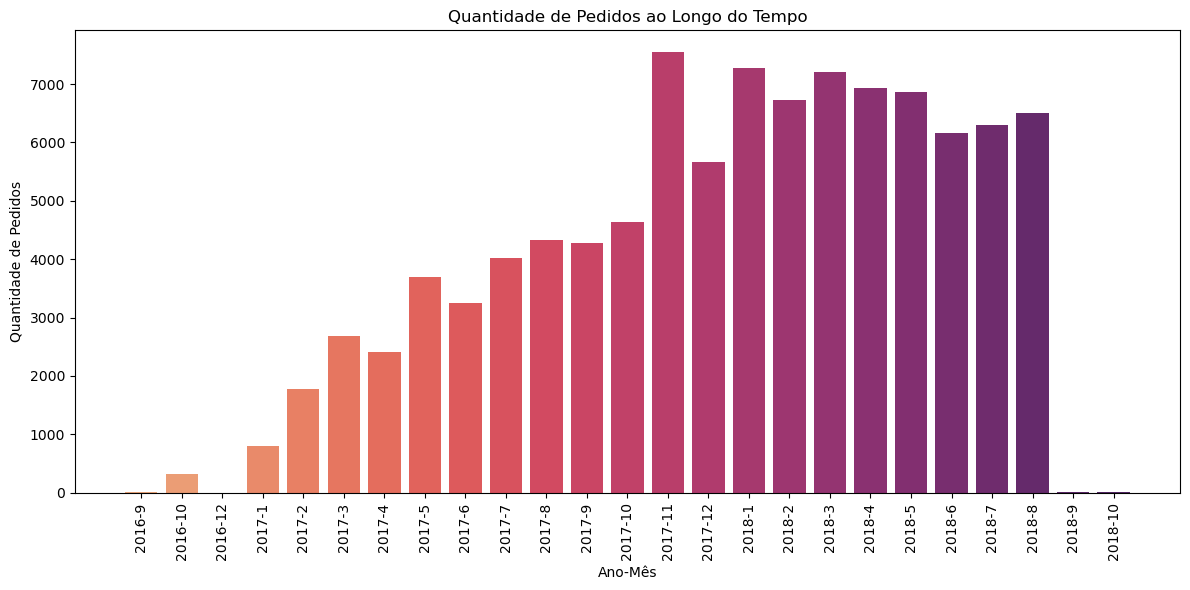

In [42]:
# plotar o gráfico de barras
palette = sns.color_palette("flare", len(orders_por_mes))

plt.figure(figsize=(12, 6))
plt.bar(orders_por_mes.index, orders_por_mes['quantidade_pedidos'], color=palette)
plt.title('Quantidade de Pedidos ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(ticks=orders_por_mes.index, labels=[f"{ano}-{mes}" for ano, mes in zip(orders_por_mes['year'], orders_por_mes['month'])], rotation=90)
plt.tight_layout()
plt.show()

### **Perguntas de Negócio:**

##### **Qual é a distribuição geográfica dos clientes por estado?**

> </br> Podemos observar que a maioria dos clientes são predominantemente de São Paulo. </br> </br>

In [5]:
# Somando a quantidade de clientes em cada estado
distribuicao_estado = customers['customer_state'].value_counts().sort_values(ascending=False)

In [6]:
print("\nDistribuição geográfica dos clientes por estado:")
print(distribuicao_estado)


Distribuição geográfica dos clientes por estado:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


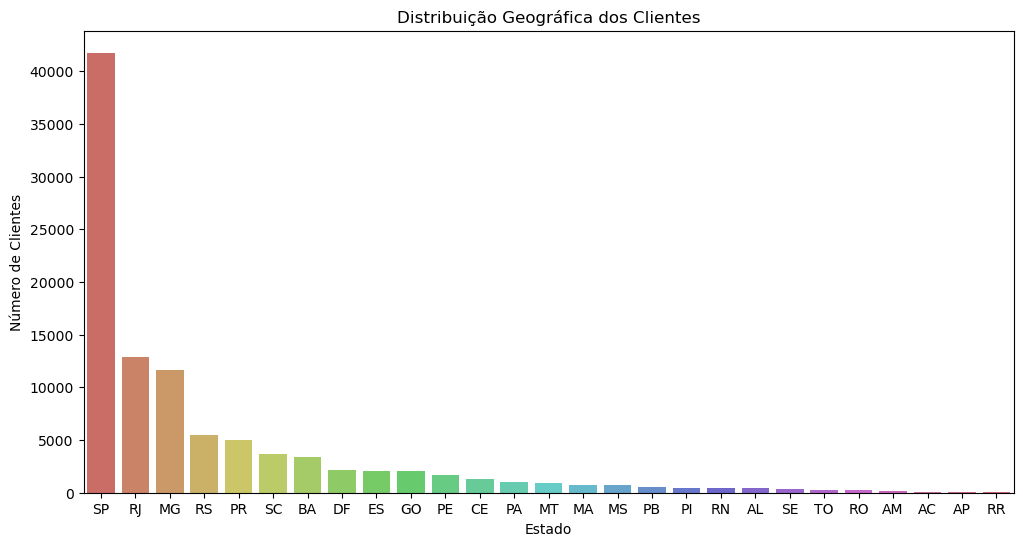

In [37]:
# Plotar um gráfico de barras:
palette = sns.color_palette("hls", len(distribuicao_estado))

plt.figure(figsize=(12, 6))
distribuicao_estado.plot(kind='bar')
sns.barplot(x=distribuicao_estado.index, y=distribuicao_estado.values, palette=palette)
plt.title('Distribuição Geográfica dos Clientes')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=360)
plt.show()

##### **Quais são os principais estados e cidades onde os clientes estão concentrados?**


##### **Principais estado:**

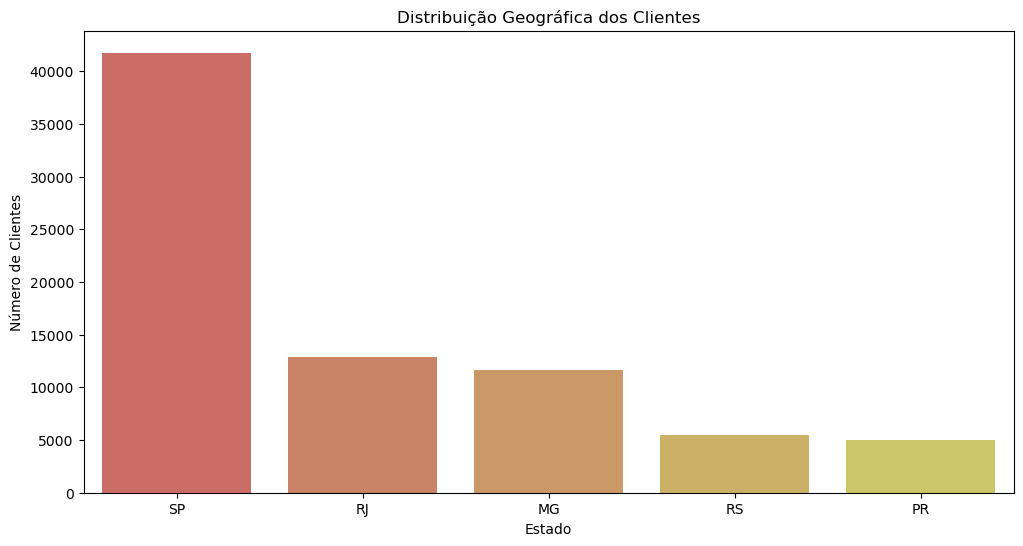

In [36]:
# Cindo principais estados onde o número de clientes é maior:
principais_estados = customers['customer_state'].value_counts().head(5)
palette = sns.color_palette("hls", len(distribuicao_estado))

plt.figure(figsize=(12, 6))
principais_estados.plot(kind='bar')
sns.barplot(x=principais_estados.index, y=principais_estados.values, palette=palette)
plt.title('Distribuição Geográfica dos Clientes')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=360)
plt.show()

##### **Principais cidades de cada estado:** 

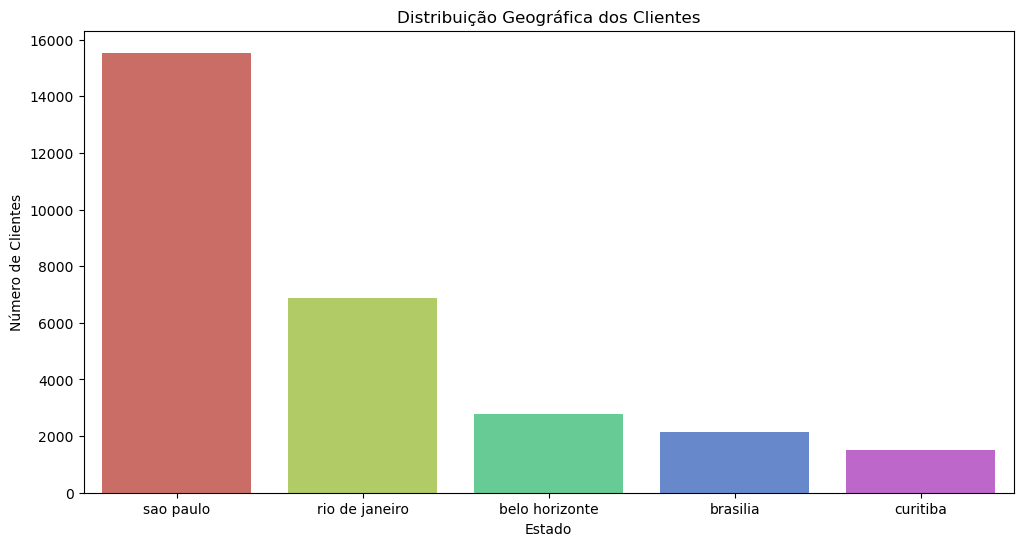

In [34]:
# Cinco principais cidades onde o número de clientes é maior:
principais_cidades = customers['customer_city'].value_counts().head(5)
palette = sns.color_palette("hls", len(principais_cidades))

plt.figure(figsize=(12, 6))
principais_cidades.plot(kind='bar')
sns.barplot(x=principais_cidades.index, y=principais_cidades.values, palette=palette)
plt.title('Distribuição Geográfica dos Clientes')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=360)
plt.show()


Principais Cidades em SP:
customer_city
sao paulo    15540
campinas      1444
guarulhos     1189
Name: count, dtype: int64


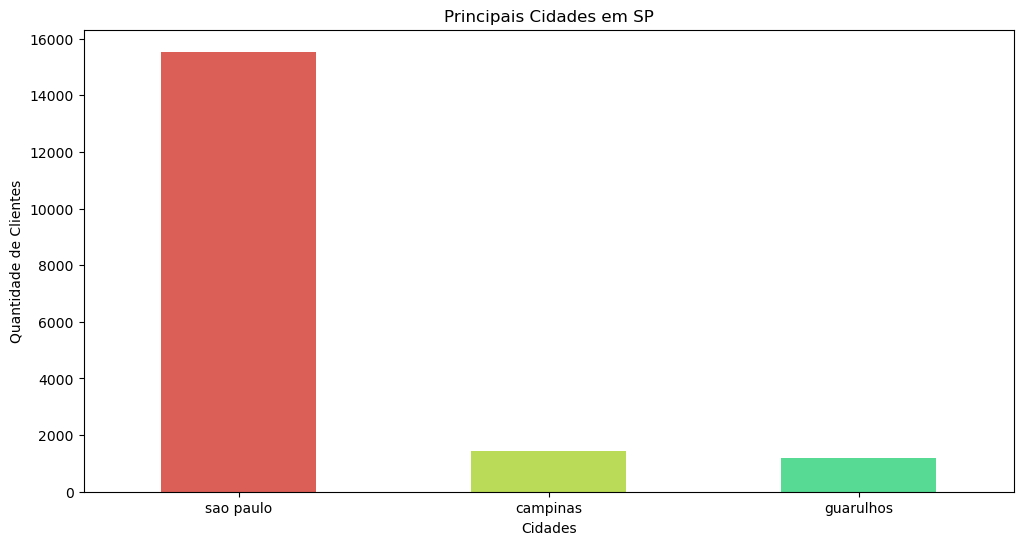


Principais Cidades em RJ:
customer_city
rio de janeiro    6882
niteroi            849
nova iguacu        442
Name: count, dtype: int64


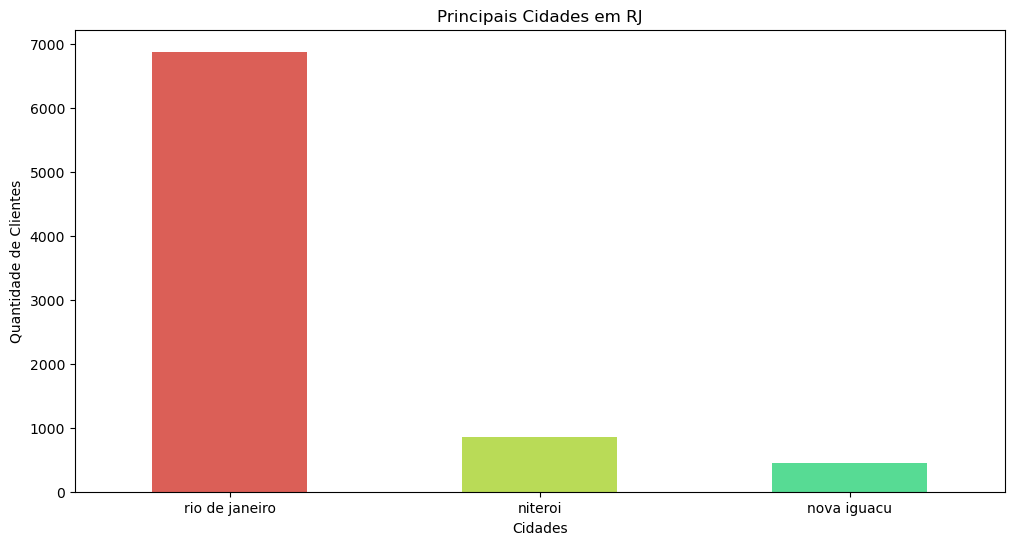


Principais Cidades em MG:
customer_city
belo horizonte    2773
juiz de fora       427
contagem           426
Name: count, dtype: int64


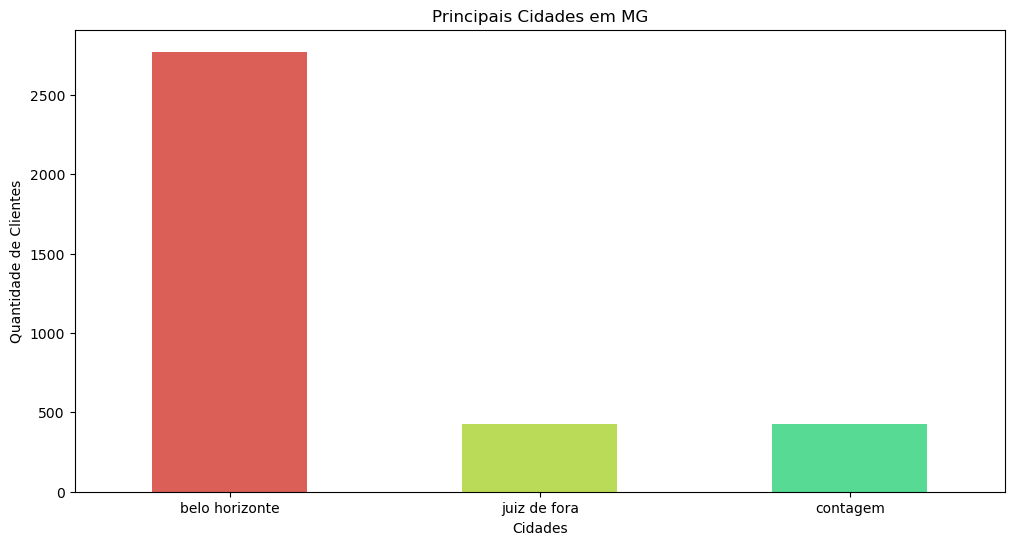


Principais Cidades em RS:
customer_city
porto alegre     1379
caxias do sul     224
canoas            210
Name: count, dtype: int64


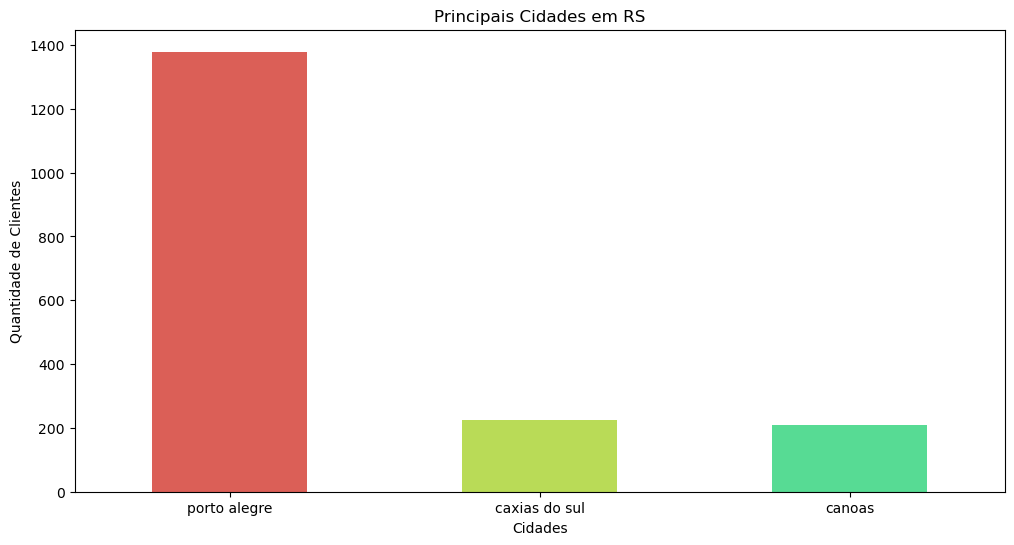


Principais Cidades em PR:
customer_city
curitiba    1521
londrina     306
maringa      271
Name: count, dtype: int64


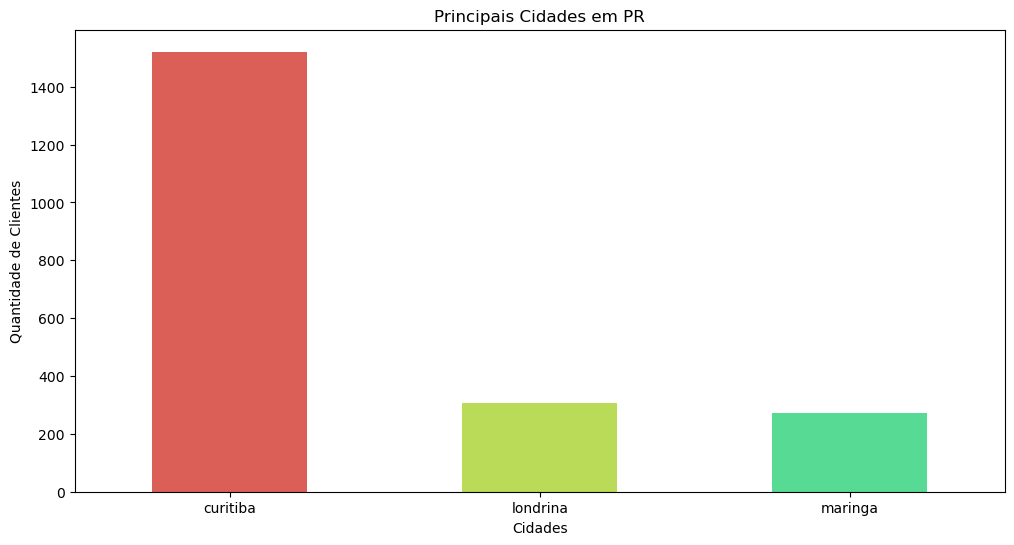

In [35]:
# Principais cidades nos principais estados
for estado in principais_estados.index:
    clientes_estado = customers [customers ['customer_state'] == estado]
    distribuicao_cidade = clientes_estado['customer_city'].value_counts()
    top_cidades = distribuicao_cidade.head(3)  # Top 3 cidades em cada estado
    print(f"\nPrincipais Cidades em {estado}:")
    print(top_cidades)

    # Cria um gráfico de barras para as top 3 cidades
    plt.figure(figsize=(12, 6))
    top_cidades.plot(kind='bar', color=palette)
    plt.title(f"Principais Cidades em {estado}")
    plt.xlabel("Cidades")
    plt.ylabel("Quantidade de Clientes")
    plt.xticks(rotation=360)
    plt.show()


##### **Itens mais vendidos e menos vendidos em cada estado:**

In [12]:
# merge das tabelas para obter informações sobre os itens do pedido e os estados dos clientes
merge1 = pd.merge(order_items, products, on='product_id')
merge2 = pd.merge(merge1, orders, on='order_id')
merge3 = pd.merge(merge2, customers, on='customer_id')

In [13]:
# agrupar os dados por estado e produto para calcular o número de vendas de cada produto em cada estado
vendas_por_estado_produto = merge3.groupby(['customer_state', 'product_id']).size().reset_index(name='vendas')

In [14]:
# identificar os itens mais vendidos e menos vendidos em cada estado com base nas contagens de vendas
produtos_mais_vendidos_por_estado = vendas_por_estado_produto.groupby('customer_state').apply(lambda x: x.loc[x['vendas'].idxmax()])
produtos_menos_vendidos_por_estado = vendas_por_estado_produto.groupby('customer_state').apply(lambda x: x.loc[x['vendas'].idxmin()])


In [18]:
print("Itens mais vendidos por estado:")
print(produtos_mais_vendidos_por_estado[['customer_state', 'product_id', 'vendas']])

Itens mais vendidos por estado:
               customer_state                        product_id  vendas
customer_state                                                         
AC                         AC  b81a05d0dd312ece2140846909f5ef81       6
AL                         AL  6cdd53843498f92890544667809f1595       9
AM                         AM  9226bd32a68934187cdb36243076ba99       4
AP                         AP  68d9c8a95d2b7cb57efe9e1e929bdd6a       5
BA                         BA  3dd2a17168ec895c781a9191c1e95ad7      24
CE                         CE  bb50f2e236e5eea0100680137654686c      21
DF                         DF  4c2394abfbac7ff59ec7a420918562fa      16
ES                         ES  422879e10f46682990de24d770e7f83d      13
GO                         GO  9571759451b1d780ee7c15012ea109d4      20
MA                         MA  389d119b48cf3043d311335e499d9c6b       8
MG                         MG  d1c427060a0f73f6b889a5c7c61f2ac4      82
MS                         MS  1

In [17]:
print("\nItens menos vendidos por estado:")
print(produtos_menos_vendidos_por_estado[['customer_state', 'product_id', 'vendas']])


Itens menos vendidos por estado:
               customer_state                        product_id  vendas
customer_state                                                         
AC                         AC  02475368dfb38934fe55f574024fe1d7       1
AL                         AL  009af1277432f1a05742df69cdf72d1e       1
AM                         AM  0176300ac9900e260f35fbddd71c6d92       1
AP                         AP  00e32638060f6356e6f00749dc466b5c       1
BA                         BA  002d4ea7c04739c130bb74d7e7cd1694       1
CE                         CE  00ab8a8b9fe219511dc3f178c6d79698       1
DF                         DF  0044d70d4e53450c0fbb8255446a797b       1
ES                         ES  001795ec6f1b187d37335e1c4704762e       1
GO                         GO  001b72dfd63e9833e8c02742adf472e3       1
MA                         MA  008b51e6be49ee039854b5e35c331b02       1
MG                         MG  0011c512eb256aa0dbbb544d8dffcf6e       1
MS                         MS 

##### **Quais são as categorias de produtos mais populares em termos de volume de vendas?**

In [29]:
# Merge dos conjuntos de dados de produtos e pedidos
dados_completos = pd.merge(products, order_items, on='product_id')

In [30]:
# Contagem das categorias de produtos
categorias = dados_completos['product_category_name'].value_counts().head(16)
print("\nCategorias de produtos mais populares:")
print(categorias)


Categorias de produtos mais populares:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
brinquedos                 4117
cool_stuff                 3796
perfumaria                 3419
bebes                      3065
eletronicos                2767
papelaria                  2517
Name: count, dtype: int64


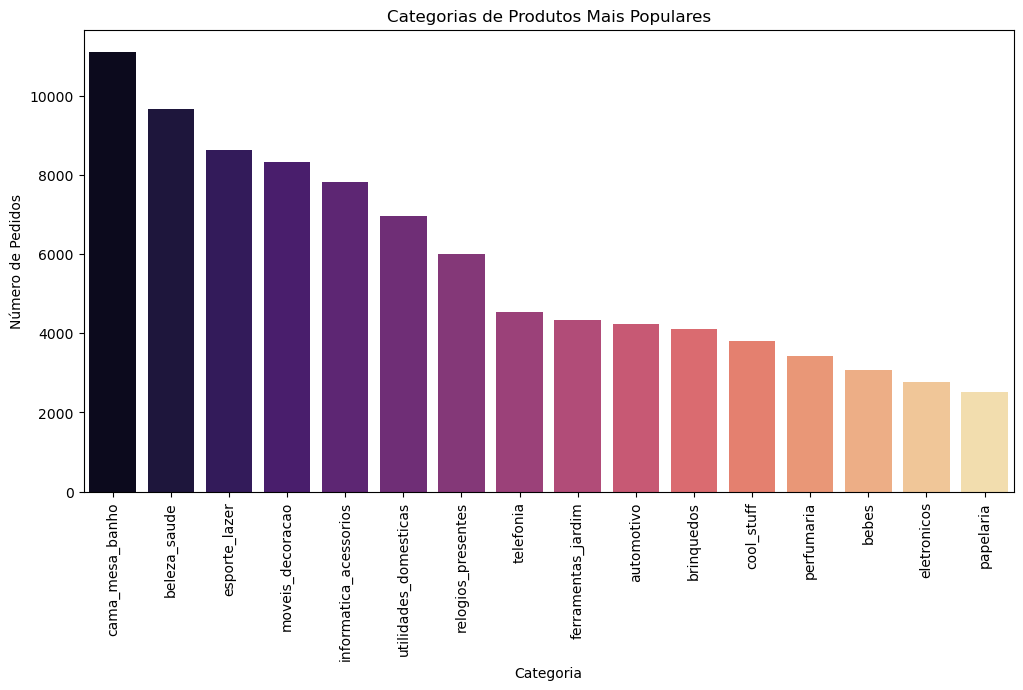

In [31]:
# Plotar as categorias de produtos mais populares
palette = sns.color_palette("magma", len(categorias))

plt.figure(figsize=(12, 6))
categorias.plot(kind='bar')
sns.barplot(x=categorias.index, y=categorias.values, palette=palette)
plt.title('Categorias de Produtos Mais Populares')
plt.xlabel('Categoria')
plt.ylabel('Número de Pedidos')
plt.show()

##### **Existe alguma relação entre o comprimento ou descrição do produto e sua popularidade de venda?**

In [146]:
# merge das tabelas products e orders_items
produtos_items_pedidos = pd.merge(products, order_items, on='product_id')

produtos_items_pedidos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [151]:
# Quantidade total de vendas de cada produto
vendas_por_produto = produtos_items_pedidos.groupby('product_id').size().reset_index(name='vendas')

vendas_por_produto

,product_id,vendas
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


In [152]:
# fazer o merge com a tabela produtos para adicionar as colunas de comprimento do nome e da descrição dos produtos
produtos_vendas_descricao = pd.merge(vendas_por_produto, products, on='product_id')

produtos_vendas_descricao

,product_id,vendas,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,1,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,1,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,1,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,2,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,1,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,cool_stuff,54.0,842.0,1.0,1400.0,42.0,25.0,15.0
32947,fff81cc3158d2725c0655ab9ba0f712c,1,beleza_saude,54.0,643.0,1.0,58.0,16.0,16.0,11.0
32948,fff9553ac224cec9d15d49f5a263411f,1,fashion_bolsas_e_acessorios,22.0,328.0,3.0,150.0,16.0,13.0,11.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0


In [157]:
# calcular a correlação entre o comprimento do nome/descrição do produto e as vendas
correlacao_comprimento_nome = produtos_vendas_descricao['product_name_lenght'].corr(produtos_vendas_descricao['vendas'])

correlacao_descricao = produtos_vendas_descricao['product_description_lenght'].corr(produtos_vendas_descricao['vendas'])


print("Correlação entre o comprimento do nome do produto e as vendas:", correlacao_comprimento_nome)
print("Correlação entre o comprimento da descrição do produto e as vendas:", correlacao_descricao)

Correlação entre o comprimento do nome do produto e as vendas: 0.009408733616650086
Correlação entre o comprimento da descrição do produto e as vendas: 0.008310051244955654


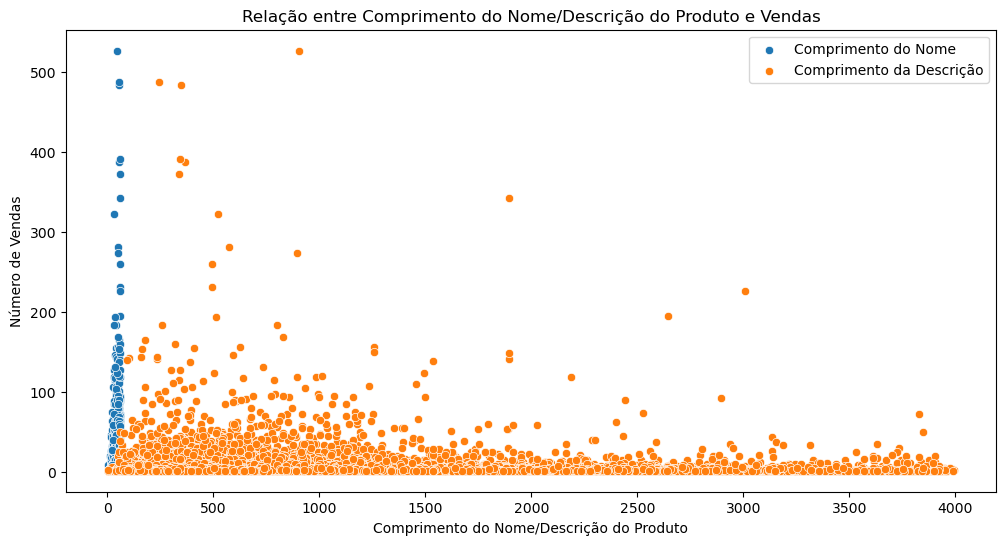

In [156]:
# plotar gráfico de dispersão:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=produtos_vendas_descricao, x='product_name_lenght', y='vendas', label='Comprimento do Nome')
sns.scatterplot(data=produtos_vendas_descricao, x='product_description_lenght', y='vendas', label='Comprimento da Descrição')
plt.title('Relação entre Comprimento do Nome/Descrição do Produto e Vendas')
plt.xlabel('Comprimento do Nome/Descrição do Produto')
plt.ylabel('Número de Vendas')
plt.legend()
plt.show()

Podemos observar que não existe uma correlação forte entre a quantidade de caracteres no nome ou na descrição do produto e o número de vendas.

##### **Há alguma relação entre o peso dos produtos e seu custo de frete?** 

In [170]:
# junta essas duas tabelas com base no product_id, vamos selecionar 10000 linhas da tabela
produtos_pedidos = pd.merge(products[['product_id', 'product_weight_g']], order_items[['order_id', 'product_id', 'freight_value']], on='product_id').head(30000)

produtos_pedidos


,product_id,product_weight_g,order_id,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,e17e4f88e31525f7deef66779844ddce,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,5236307716393b7114b53ee991f36956,17.99
2,96bd76ec8810374ed1b65e291975717f,154.0,01f66e58769f84129811d43eefd187fb,7.82
3,cef67bcfe19066a932b7673e239eb23d,371.0,143d00a4f2dde4e0364ee1821577adb3,9.54
4,9dc1a7de274444849c219cff195d0b71,625.0,86cafb8794cb99a9b1b77fc8e48fbbbb,8.29
...,...,...,...,...
29995,ab9cf155f8280c3739b09fe341a185e8,225.0,6108ae9acd8ee0ffd527598b9ebc6acc,7.78
29996,ab9cf155f8280c3739b09fe341a185e8,225.0,6e4f6fdc70c0d961b8597e98430b8d4f,15.79
29997,ab9cf155f8280c3739b09fe341a185e8,225.0,758fbb6d7ea877ff4005851bb75238c2,11.85
29998,ab9cf155f8280c3739b09fe341a185e8,225.0,83abd54a97c64e537933fcfe2fe1c666,14.10


/var/folders/73/ffr4h5w915q1f6n1d6g6dp1r0000gn/T/ipykernel_41340/2571455861.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=produtos_pedidos, x='product_weight_g', y='freight_value', palette=palette)


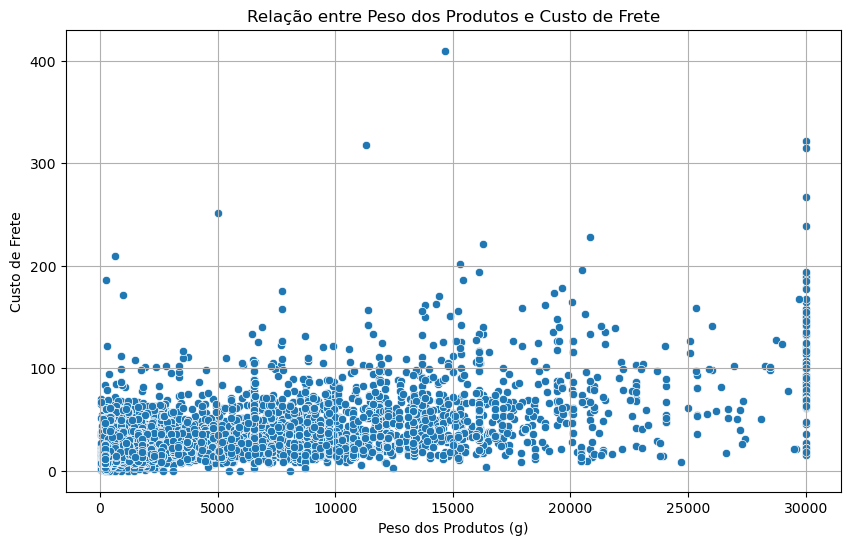

In [171]:
# Plotar um gráfico de dispersão para visualizar a relação entre o peso dos produtos e o custo de frete
plt.figure(figsize=(10, 6))
sns.scatterplot(data=produtos_pedidos, x='product_weight_g', y='freight_value', palette=palette)
plt.title('Relação entre Peso dos Produtos e Custo de Frete')
plt.xlabel('Peso dos Produtos (g)')
plt.ylabel('Custo de Frete')
plt.grid(True)
plt.show()

In [172]:
produtos_pedidos['product_weight_g'].corr(produtos_pedidos['freight_value'])


0.6230697748797451

Podemos observar que há uma relação entre o valor do frete e o pedo do produto, onde quanto maior for o peso maior será o frete.

##### **Existe algum padrão sazonal nas datas de compra dos pedidos?**

In [174]:
# formatar os dados 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# extrair os meses de cada compra
orders["order_month"] = orders['order_purchase_timestamp'].dt.month

In [176]:
# Contar o número de pedidos por mês
pedidos_por_mes = orders.groupby('order_month').size()

pedidos_por_mes

order_month
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
dtype: int64

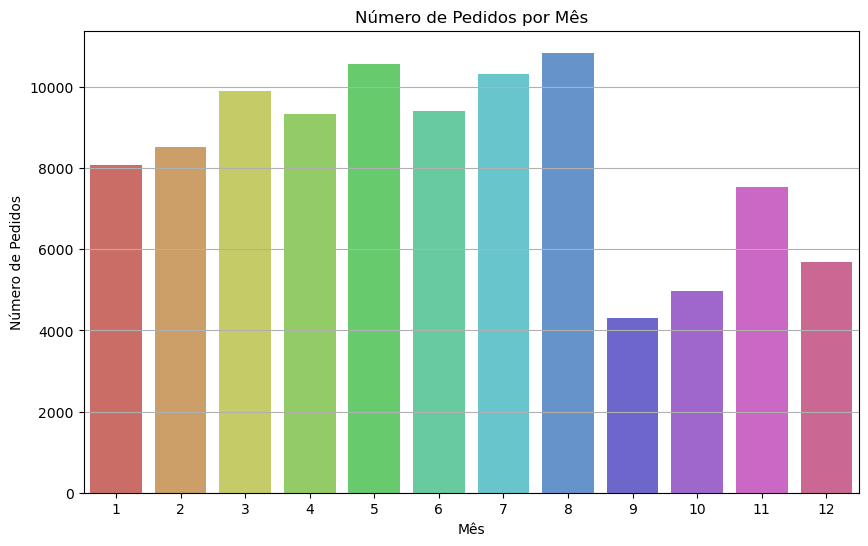

In [179]:
# Plotar o gráfico de barras
palette = sns.color_palette("hls", len(pedidos_por_mes))

plt.figure(figsize=(10, 6))
pedidos_por_mes.plot(kind='bar')
sns.barplot(x=pedidos_por_mes.index, y=pedidos_por_mes.values, palette=palette)
plt.title('Número de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Podemos observar que as vendas cairam a partir do mês 9, para melhorar a visualização vamos ver a partir de um periodo definido:

In [196]:
# Filtrar os dados para um determinado ano 
orders_ano_desejado = orders[orders['order_purchase_timestamp'].dt.year == 2018]

In [197]:
# Contar o número de pedidos por mês
pedidos_por_mes_filtrado = orders_ano_desejado.groupby('order_month').size()


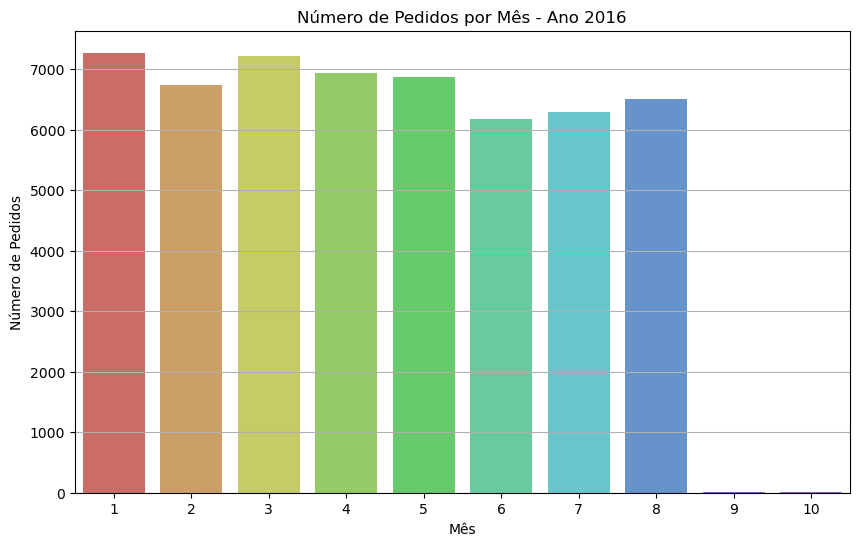

In [198]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
pedidos_por_mes.plot(kind='bar')
sns.barplot(x=pedidos_por_mes_filtrado.index, y=pedidos_por_mes_filtrado.values, palette=palette)
plt.title(f'Número de Pedidos por Mês - Ano 2016')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Não foi possível achar uma relação com a queda das compras a partir do mês 9.

##### **Qual é o tempo médio de entrega dos pedidos em relação à data estimada de entrega?**

In [41]:
# Converter os dados strings para o formato de data
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Remover linhas nulas
orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)

# calcular o tempo de entrega para cada pedido
orders['tempo_entrega'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']

orders['tempo_entrega']

0        7 days 02:34:47
1        5 days 08:32:15
2       17 days 05:53:31
3       12 days 23:31:18
4        9 days 05:42:58
              ...       
99436   10 days 08:51:59
99437    1 days 06:22:04
99438    5 days 12:35:43
99439   20 days 00:27:06
99440   17 days 10:51:30
Name: tempo_entrega, Length: 96476, dtype: timedelta64[ns]

In [42]:
# Calcular o tempo médio de entrega em relação à data estimada de entrega
tempo_medio_entrega = orders['tempo_entrega'].mean().days

tempo_medio_entrega

11

In [43]:
print("Tempo médio de entrega em relação à data estimada de entrega:", tempo_medio_entrega, "dias")

Tempo médio de entrega em relação à data estimada de entrega: 11 dias


##### **Qual é a pontuação média de revisão dos pedidos?**

In [44]:
pontuacao_media = orders_review['review_score'].mean()

In [45]:
print("Pontuação média de revisão dos pedidos:", pontuacao_media)

Pontuação média de revisão dos pedidos: 4.08642062404257


##### **Qual é o tempo médio entre a compra e a aprovação do pedido?**

In [4]:
# formatar datas
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

In [5]:
# Calcular a diferença de tempo entre a compra e a aprovação do pedido
tempo_aprovacao = orders['order_approved_at'] - orders['order_purchase_timestamp']

tempo_aprovacao

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Length: 99441, dtype: timedelta64[ns]

In [6]:
tempo_medio_aprovacao = tempo_aprovacao.mean()
print("Tempo médio entre a compra e a aprovação do pedido:", tempo_medio_aprovacao)

Tempo médio entre a compra e a aprovação do pedido: 0 days 10:25:08.739486910


### **Variância e Desvio Padrão de algumas tabelas**

- Se calculássemos o desvio padrão para a coluna 'product_photos_qty' da tabela 'products', isso nos daria uma ideia de quão dispersos estão os números de fotos dos produtos. Por exemplo, se o desvio padrão for alto, significa que os números de fotos dos produtos variam muito entre si, enquanto um desvio padrão baixo indica que esses números estão mais próximos da média.

In [20]:
# Calcular a variância e o desvio padrão para 'product_photos_qty' na tabela 'products'
variance_photos_qty = products['product_photos_qty'].var()
std_dev_photos_qty = products['product_photos_qty'].std()

In [21]:
print("Variância de product_photos_qty:", variance_photos_qty)
print("Desvio padrão de product_photos_qty:", std_dev_photos_qty)

Variância de product_photos_qty: 3.0163548810996157
Desvio padrão de product_photos_qty: 1.7367656379315015


- No caso da coluna 'review_score' da tabela 'reviews', o desvio padrão nos daria uma ideia de quão dispersas estão as pontuações das revisões. Um desvio padrão alto indicaria que as pontuações das revisões estão muito dispersas, enquanto um desvio padrão baixo indicaria que as pontuações estão mais próximas da média, sugerindo uma consistência nas avaliações.

In [22]:
# Calcular a variância e o desvio padrão para 'review_score' na tabela 'reviews'
variance_review_score = orders_review['review_score'].var()
std_dev_review_score = orders_review['review_score'].std()

In [23]:
print("\nVariância de review_score:", variance_review_score)
print("Desvio padrão de review_score:", std_dev_review_score)


Variância de review_score: 1.8159695146163577
Desvio padrão de review_score: 1.3475791311148884
